In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
raw_data_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'raw')
processed_data_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'processed')
figures_path = os.path.join(os.path.dirname(os.getcwd()), 'figures')

In [4]:
pd.options.display.float_format = '{:.2f}'.format

In [5]:
df_FUNO11 = pd.read_csv(os.path.join(raw_data_path, 'FUNO11.csv'))

In [6]:
df_FUNO11['Fecha'] = pd.to_datetime(df_FUNO11['Fecha'], format='%Y/%m/%d')
df_FUNO11.set_index('Fecha', inplace=True)
df_FUNO11.head()

,Precio,Importe
Fecha,,
2011-03-18,17.13,9225887.90
2011-03-22,16.92,8678341.18
2011-03-23,16.63,32832212.50
2011-03-24,16.64,12175114.00
2011-03-25,16.69,868056.00


In [7]:
df_FUNO11['dia_año'] = df_FUNO11.index.dayofyear
df_FUNO11['dia_semana'] = df_FUNO11.index.dayofweek
df_FUNO11['mes'] = df_FUNO11.index.month
df_FUNO11['año'] = df_FUNO11.index.year
df_FUNO11['trimestre'] = df_FUNO11.index.quarter

In [8]:
primer_dia_mes = df_FUNO11.groupby([df_FUNO11.index.year, df_FUNO11.index.month]).head(1).index
ultimo_dia_mes = df_FUNO11.groupby([df_FUNO11.index.year, df_FUNO11.index.month]).tail(1).index
primer_dia_trimestre = df_FUNO11.groupby([df_FUNO11.index.year, df_FUNO11.index.quarter]).head(1).index
ultimo_dia_trimestre = df_FUNO11.groupby([df_FUNO11.index.year, df_FUNO11.index.quarter]).tail(1).index
primer_dia_año = df_FUNO11.groupby(df_FUNO11.index.year).head(1).index
ultimo_dia_año = df_FUNO11.groupby(df_FUNO11.index.year).tail(1).index

In [9]:
df_FUNO11['inicio_mes'] = df_FUNO11.index.isin(primer_dia_mes).astype(int)
df_FUNO11['fin_mes'] = df_FUNO11.index.isin(ultimo_dia_mes).astype(int)
df_FUNO11['inicio_trimestre'] = df_FUNO11.index.isin(primer_dia_trimestre).astype(int)
df_FUNO11['fin_trimestre'] = df_FUNO11.index.isin(ultimo_dia_trimestre).astype(int)
df_FUNO11['inicio_año'] = df_FUNO11.index.isin(primer_dia_año).astype(int)
df_FUNO11['fin_año'] = df_FUNO11.index.isin(ultimo_dia_año).astype(int)
df_FUNO11['tiempo_desde_epoch'] = (df_FUNO11.index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [10]:
df_FUNO11.loc[df_FUNO11.index[0], 'inicio_mes'] = 0
df_FUNO11.loc[df_FUNO11.index[0], 'inicio_trimestre'] = 0
df_FUNO11.loc[df_FUNO11.index[0], 'inicio_año'] = 0

In [11]:
df_FUNO11.sample(5).sort_index(ascending=True)

,Precio,Importe,dia_año,dia_semana,mes,año,trimestre,inicio_mes,fin_mes,inicio_trimestre,fin_trimestre,inicio_año,fin_año,tiempo_desde_epoch
Fecha,,,,,,,,,,,,,,
2013-05-14,36.32,815828663.73,134,1,5,2013,2,0,0,0,0,0,0,1368489600
2015-09-23,33.16,135661783.76,266,2,9,2015,3,0,0,0,0,0,0,1442966400
2018-03-13,27.51,98872959.65,72,1,3,2018,1,0,0,0,0,0,0,1520899200
2019-11-21,30.21,343230447.57,325,3,11,2019,4,0,0,0,0,0,0,1574294400
2021-02-25,23.34,217755040.33,56,3,2,2021,1,0,0,0,0,0,0,1614211200


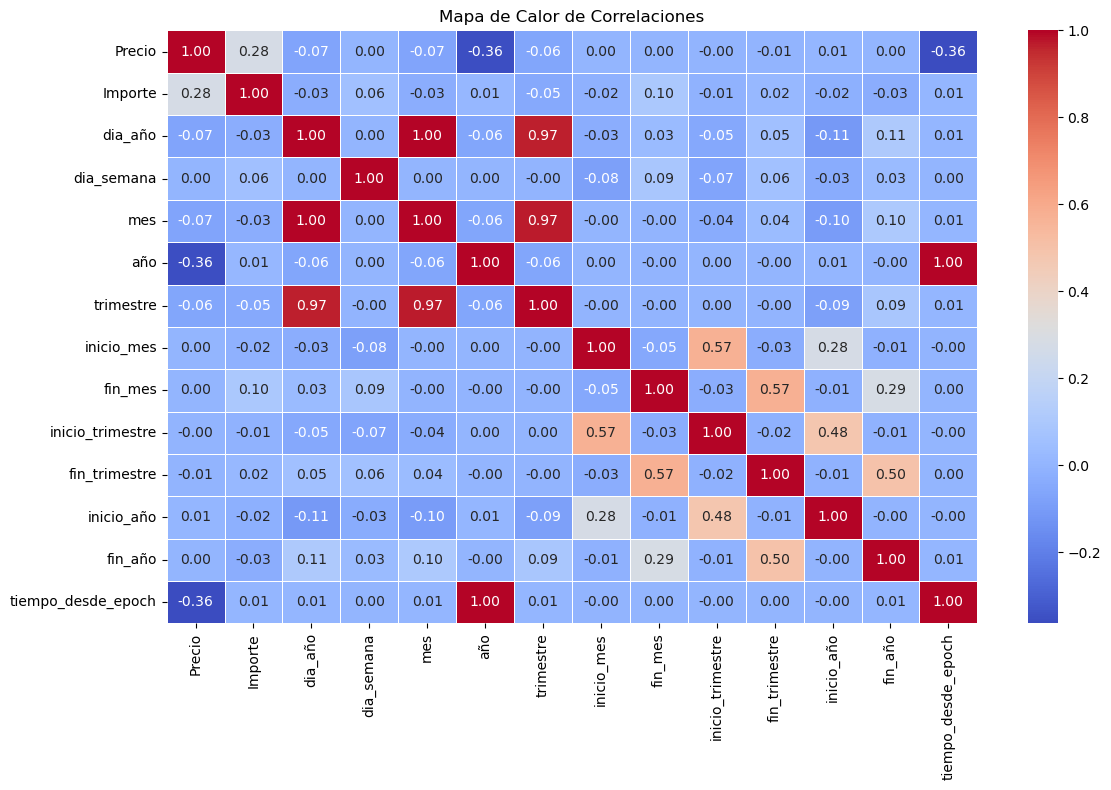

In [12]:
matriz_corr = df_FUNO11.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.savefig(os.path.join(figures_path, 'Mapa_Calor_Correlaciones.png'))
plt.tight_layout()
plt.show()

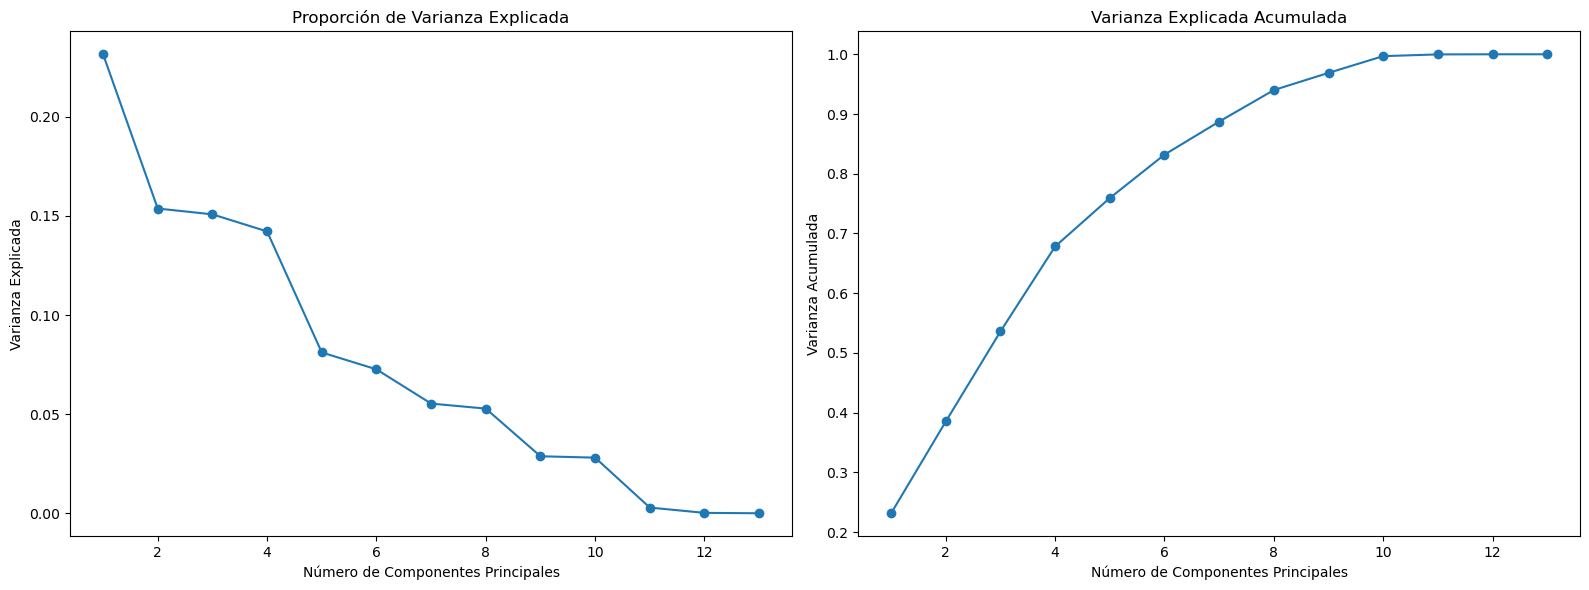

In [13]:
X = df_FUNO11.drop(columns='Precio')
X_escalado = StandardScaler().fit_transform(X)

pca = PCA()
pca.fit(X_escalado)

varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = varianza_explicada.cumsum()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(range(1, len(varianza_explicada) + 1), varianza_explicada, marker='o')
ax[0].set_title('Proporción de Varianza Explicada')
ax[0].set_xlabel('Número de Componentes Principales')
ax[0].set_ylabel('Varianza Explicada')

ax[1].plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
ax[1].set_title('Varianza Explicada Acumulada')
ax[1].set_xlabel('Número de Componentes Principales')
ax[1].set_ylabel('Varianza Acumulada')

plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'Varianza_Explicada.png'))
plt.show()

In [14]:
df_FUNO11.to_csv(os.path.join(processed_data_path, 'FUNO11_procesado.csv'))

In [15]:
pca = PCA(n_components=10)
pca.fit(X_escalado)
df_pca_FUNO11 = pd.DataFrame(pca.transform(X_escalado), columns=[f'PC{i+1}' for i in range(pca.n_components_)])
df_pca_FUNO11['Precio'] = df_FUNO11['Precio'].values
df_pca_FUNO11['Fecha'] = df_FUNO11.index
df_pca_FUNO11.set_index('Fecha', inplace=True)

df_pca_FUNO11.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Precio
Fecha,,,,,,,,,,,
2011-03-18,-1.76,-2.17,1.38,-0.33,0.14,1.56,-0.22,0.10,0.05,0.03,17.13
2011-03-22,-1.76,-2.30,1.07,-0.29,-1.07,-0.15,0.04,-0.01,0.07,0.01,16.92
2011-03-23,-1.75,-2.25,1.18,-0.30,-0.59,0.37,-0.04,0.05,0.06,0.02,16.63
2011-03-24,-1.74,-2.21,1.28,-0.32,-0.25,0.99,-0.13,0.07,0.06,0.03,16.64
2011-03-25,-1.72,-2.17,1.37,-0.33,0.11,1.58,-0.22,0.09,0.05,0.03,16.69


In [16]:
archivos_FIBRAs = ['FIBRAPL14.csv', 'FIBRAMQ12.csv', 'TERRA13.csv', 'DANHOS13.csv', 'FMTY14.csv', 'FIHO12.csv']

In [17]:
# Transformación de los datos de las demás FIBRAs

for i, archivo in enumerate(archivos_FIBRAs):
    # Cargar datos
    df_fibra = pd.read_csv(os.path.join(raw_data_path, archivo))
    df_fibra['Fecha'] = pd.to_datetime(df_fibra['Fecha'], format='%Y/%m/%d')
    df_fibra.set_index('Fecha', inplace=True)

    # Crear variables de tiempo
    df_fibra['dia_año'] = df_fibra.index.dayofyear
    df_fibra['dia_semana'] = df_fibra.index.dayofweek
    df_fibra['mes'] = df_fibra.index.month
    df_fibra['año'] = df_fibra.index.year
    df_fibra['trimestre'] = df_fibra.index.quarter

    # Identificar primer y último día hábil de cada mes, trimestre y año
    primer_dia_mes = df_fibra.groupby([df_fibra.index.year, df_fibra.index.month]).head(1).index
    ultimo_dia_mes = df_fibra.groupby([df_fibra.index.year, df_fibra.index.month]).tail(1).index
    primer_dia_trimestre = df_fibra.groupby([df_fibra.index.year, df_fibra.index.quarter]).head(1).index
    ultimo_dia_trimestre = df_fibra.groupby([df_fibra.index.year, df_fibra.index.quarter]).tail(1).index
    primer_dia_año = df_fibra.groupby(df_fibra.index.year).head(1).index
    ultimo_dia_año = df_fibra.groupby(df_fibra.index.year).tail(1).index

    # Agregar primeros y últimos días hábiles a DataFrame
    df_fibra['inicio_mes'] = df_fibra.index.isin(primer_dia_mes).astype(int)
    df_fibra['fin_mes'] = df_fibra.index.isin(ultimo_dia_mes).astype(int)
    df_fibra['inicio_trimestre'] = df_fibra.index.isin(primer_dia_trimestre).astype(int)
    df_fibra['fin_trimestre'] = df_fibra.index.isin(ultimo_dia_trimestre).astype(int)
    df_fibra['inicio_año'] = df_fibra.index.isin(primer_dia_año).astype(int)
    df_fibra['fin_año'] = df_fibra.index.isin(ultimo_dia_año).astype(int)
    df_fibra['tiempo_desde_epoch'] = (df_fibra.index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

    # Corregir primer día de cotización
    df_fibra.loc[df_fibra.index[0], ['inicio_mes', 'inicio_trimestre', 'inicio_año']] = 0

    # Guardar DataFrame procesado
    df_fibra.to_csv(os.path.join(processed_data_path, f'{archivo[:-4]}_procesado.csv'))